In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # biar debug output nya gk rusuh

In [2]:
# import python module nya
# pyright: reportMissingImports=false, reportUnusedVariable=warning, reportUntypedBaseClass=error, reportMissingModuleSource=false

import tensorflow_hub as hub
import cv2
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# buka pre-trained gambar nya
detector = hub.load("./cv_models")

# labels yang digunakan untuk gambar
class_name = {
    1: "person", 2: "bicycle", 3: "car", 4: "motorcycle", 5: "airplane",
    6: "bus", 7: "train", 8: "truck", 9: "boat", 10: "traffic light",
    11: "fire hydrant", 12: "-", 13: "stop sign", 14: "parking meter",
    15: "bench", 16: "bird", 17: "cat", 18: "dog", 19: "horse",
    20: "sheep", 21: "cow", 22: "elephant", 23: "bear", 24: "zebra",
    25: "giraffe", 26: "-", 27: "backpack", 28: "umbrella", 29: "-",
    30: "-", 31: "handbag", 32: "tie", 33: "suitcase", 34: "frisbee",
    35: "skis", 36: "snowboard", 37: "sports ball", 38: "kite",
    39: "baseball bat", 40: "baseball glove", 41: "skateboard",
    42: "surfboard", 43: "tennis racket", 44: "bottle", 45: "-",
    46: "wine glass", 47: "cup", 48: "fork", 49: "knife", 50: "spoon",
    51: "bowl", 52: "banana", 53: "apple", 54: "sandwich", 55: "orange",
    56: "broccoli", 57: "carrot", 58: "hot dog", 59: "pizza", 60: "donut",
    61: "cake", 62: "chair", 63: "couch", 64: "potted plant", 65: "bed",
    66: "-", 67: "dining table", 68: "-", 69: "-", 70: "toilet",
    71: "-", 72: "tv", 73: "laptop", 74: "mouse", 75: "remote",
    76: "keyboard", 77: "cell phone", 78: "microwave", 79: "oven",
    80: "toaster", 81: "sink", 82: "refrigerator", 83: "-",
    84: "book", 85: "clock", 86: "vase", 87: "scissors",
    88: "teddy bear", 89: "hair drier", 90: "toothbrush", 91: "-"
}

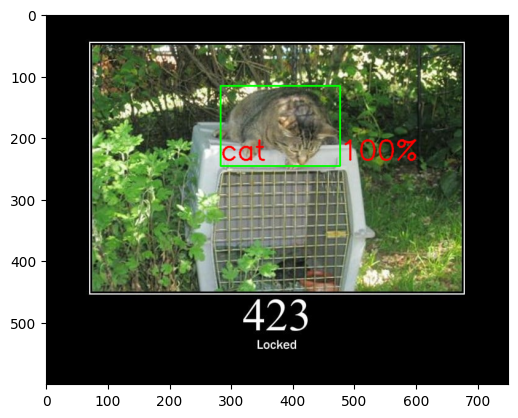

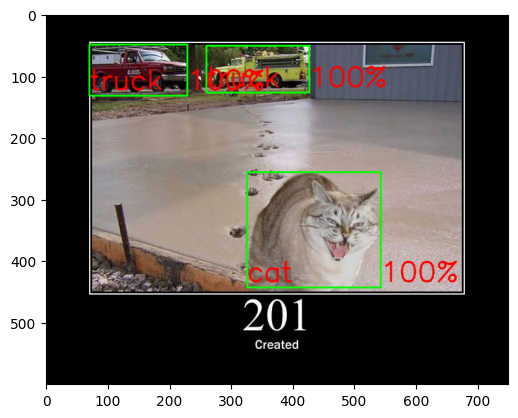

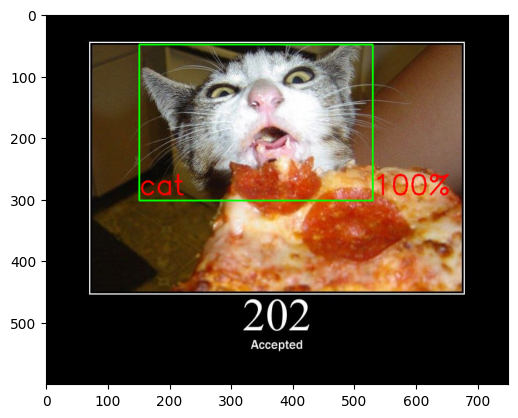

In [7]:
# lakukan deteksi object dari folder images
# pyright: reportOptionalCall=false, reportGeneralTypeIssues=false

images_path = "./images/"
for image_path in os.listdir(images_path):
    if image_path.endswith(".jpg") or image_path.endswith(".png"):
        input_path = os.path.join(images_path, image_path)
        image = cv2.imread(input_path)

        rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        rgb_tensor = tf.convert_to_tensor(image, dtype=tf.uint8)
        rgb_tensor = tf.expand_dims(rgb_tensor, 0)
        boxes, scores, classes, num_detections = detector(rgb_tensor)

        boxes = boxes[0].numpy()
        scores = scores[0].numpy()
        classes = classes[0].numpy().astype(numpy.int32)
        num_detections = int(num_detections[0])

        success = False

        for score, (ymin,xmin,ymax,xmax), label in zip(scores, boxes, classes):
            if score < 0.5:
                continue

            score_txt = f'{100 * round(score)}%'
            img_boxes = cv2.rectangle(rgb, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0,255,0), 2)     
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(img_boxes, class_name[label], (int(xmin), int(ymax)-10), font, 1.5, (255,0,0), 2, cv2.LINE_AA)
            cv2.putText(img_boxes, score_txt, (int(xmax), int(ymax)-10), font, 1.5, (255,0,0), 2, cv2.LINE_AA)

            plt.imshow(img_boxes)
            output_path = os.path.join("./output", image_path)

            # konversi ke BGR karena opencv menggunakan BGR
            img_boxes = cv2.cvtColor(img_boxes, cv2.COLOR_RGB2BGR)
            cv2.imwrite(output_path, img_boxes)

            success = True

        if not success:
            print("No object detected at file: ", image_path)
        else:
            plt.show()